In [11]:
!virtualenv -p python3 venv

Already using interpreter /usr/bin/python3
Using base prefix '/usr'
New python executable in /home/muskan/Desktop/facerecog/venv/bin/python3
Not overwriting existing python script /home/muskan/Desktop/facerecog/venv/bin/python (you must use /home/muskan/Desktop/facerecog/venv/bin/python3)
Installing setuptools, pkg_resources, pip, wheel...done.


In [3]:
import cv2
import os
import numpy as np
# !pip install matplotlib
import matplotlib.pyplot as plt

ImportError: No module named cv2

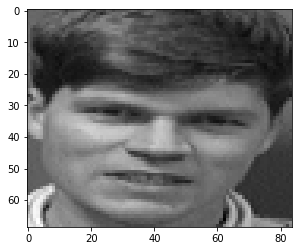

In [3]:
dataTrainX = []
dataTestX = []
dataTrainY = []
dataTestY = []
for folder in os.listdir('dataset'):
    tmp = []
    for file in os.listdir('dataset/'+folder+'/'):
        img  = cv2.imread('dataset/'+folder+'/'+file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img =cv2.resize(img,(int(img.shape[0]*0.75),int(img.shape[1]*0.75)))
        OrigDim = img.shape
        img = img.flatten()
        tmp.append(img)
    for i in range(len(tmp)):
        if(i<int(0.75*len(tmp))):
            dataTrainX.append(tmp[i])
            dataTrainY.append(folder)
        else:
            dataTestX.append(tmp[i])
            dataTestY.append(folder)
dataTrainX = np.asarray(dataTrainX)
dataTrainY = np.asarray(dataTrainY)
dataTestX = np.asarray(dataTestX)
dataTestY = np.asarray(dataTestY)
OrigDim
plt.imshow(dataTrainX[15].reshape(OrigDim), cmap = 'gray')


In [4]:
dataTrainX.shape

(280, 5796)

In [13]:
#training
mean = np.mean(dataTrainX,axis=0)
deviationFromMean = (dataTrainX-mean)
covvar = np.dot(deviationFromMean.T,deviationFromMean)/len(deviationFromMean)
d,v,eigVec = np.linalg.svd(covvar)
print(eigVec.shape)
# # ##sorting eigen vectors
# EigenVecVal=[(eigVal[i],eigVec[i])for i in range(len(eigVal))]
# EigenVecVal.sort(reverse=True)
param=100
col=dataTrainX.shape[1]
W=np.ndarray(shape=(param,col))
for i in range(0,param):
    W[i,:] = eigVec[i,:]
W=np.transpose(W)
eigFaceMatrix = np.dot(dataTrainX,W)
covvar

(5796, 5796)


array([[1260.21110969, 1248.42246173, 1247.27056122, ..., -110.01517857,
         -88.63443878,  -34.1142602 ],
       [1248.42246173, 1245.53968112, 1242.08943878, ..., -112.40982143,
         -92.40484694,  -40.34359694],
       [1247.27056122, 1242.08943878, 1244.09061224, ..., -116.95714286,
         -97.00867347,  -44.75938776],
       ...,
       [-110.01517857, -112.40982143, -116.95714286, ..., 1935.7875    ,
        1834.58214286, 1702.54464286],
       [ -88.63443878,  -92.40484694,  -97.00867347, ..., 1834.58214286,
        1862.57346939, 1735.0127551 ],
       [ -34.1142602 ,  -40.34359694,  -44.75938776, ..., 1702.54464286,
        1735.0127551 , 1789.92096939]])

/home/muskan/Desktop/facerecog/venv/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Accuracy = 96.66666666666667
correct predicted=116
total test images = 120


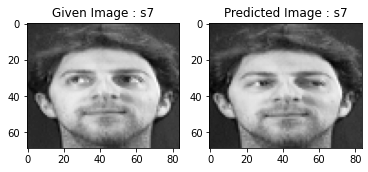

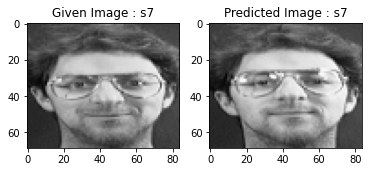

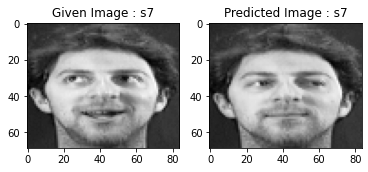

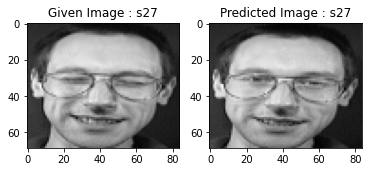

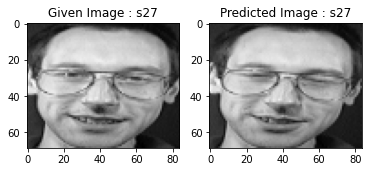

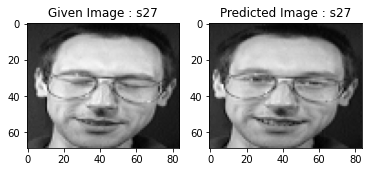

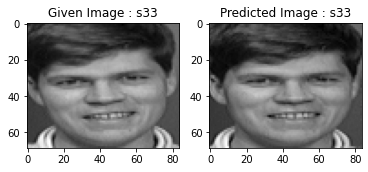

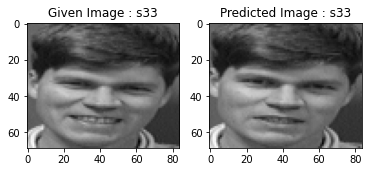

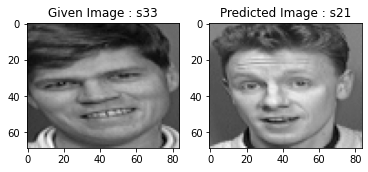

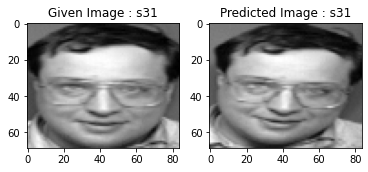

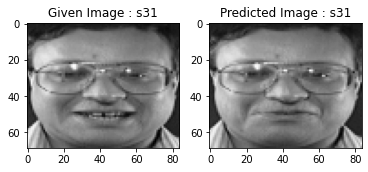

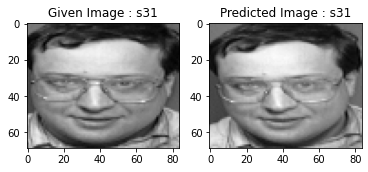

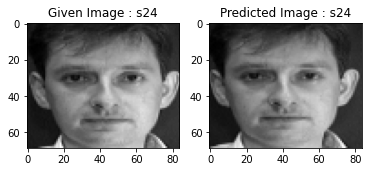

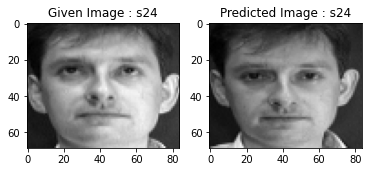

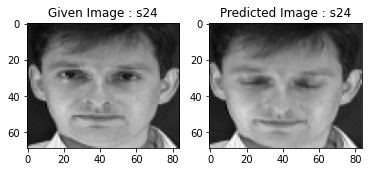

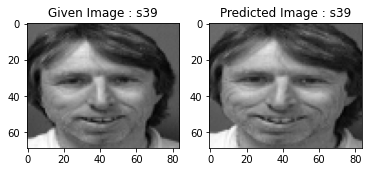

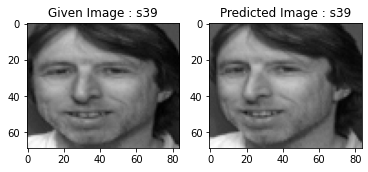

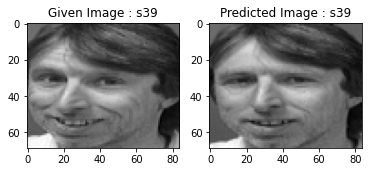

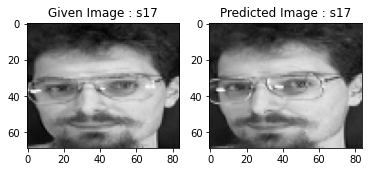

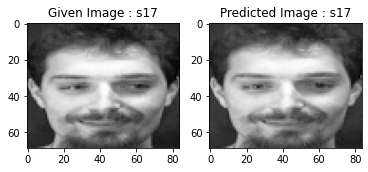

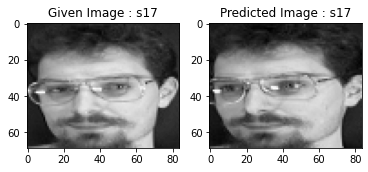

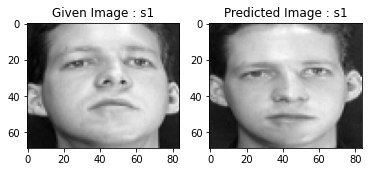

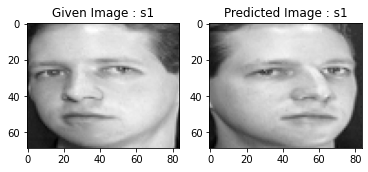

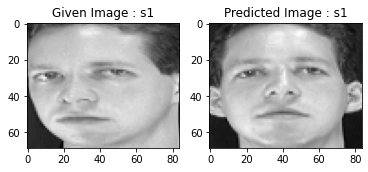

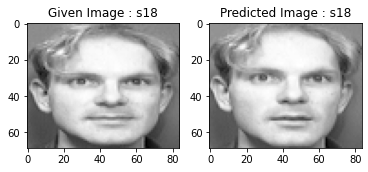

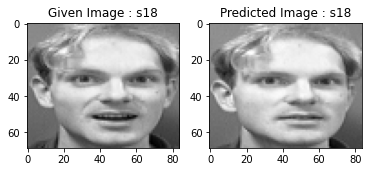

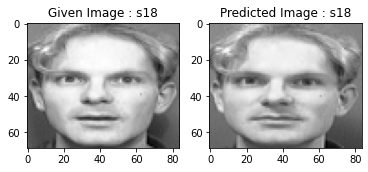

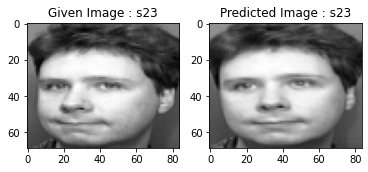

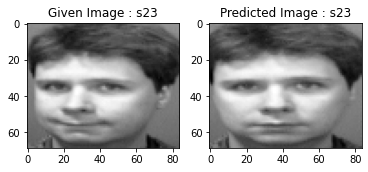

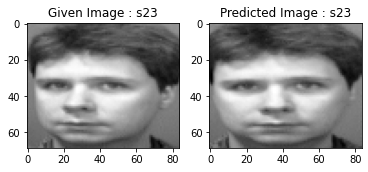

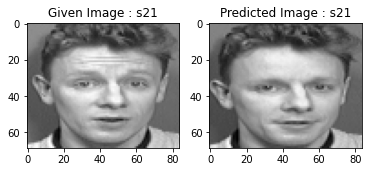

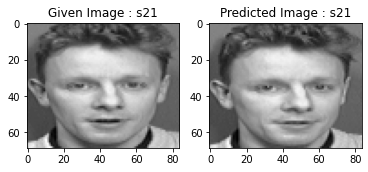

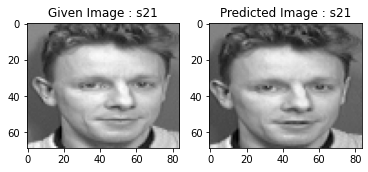

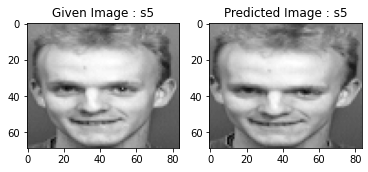

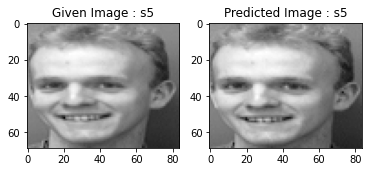

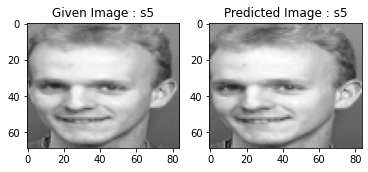

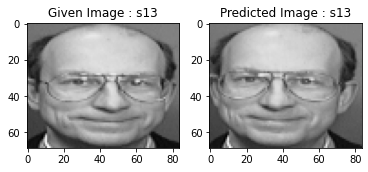

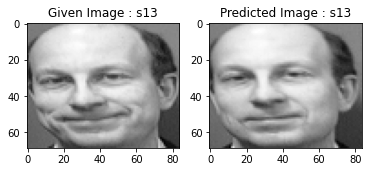

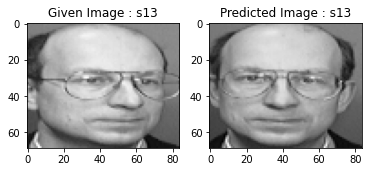

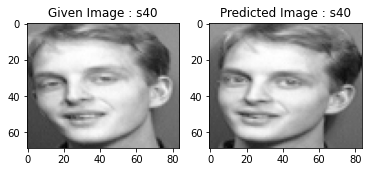

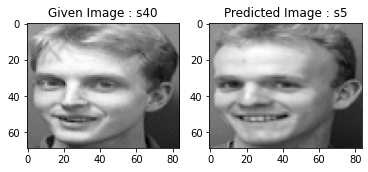

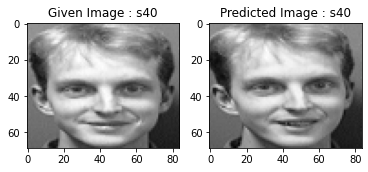

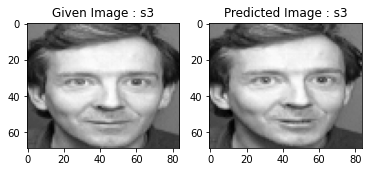

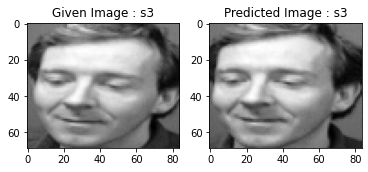

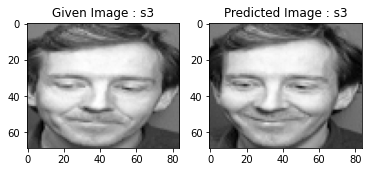

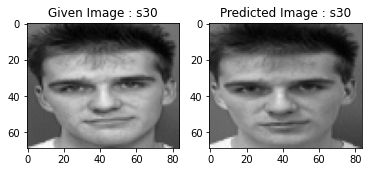

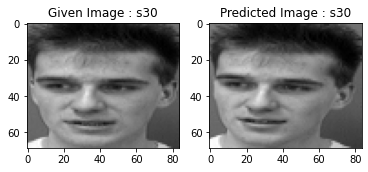

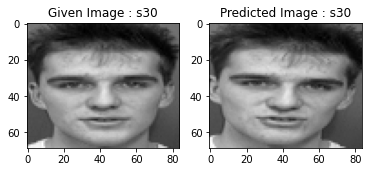

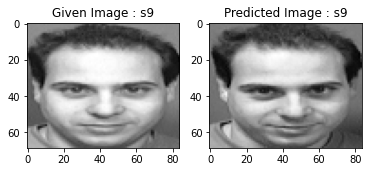

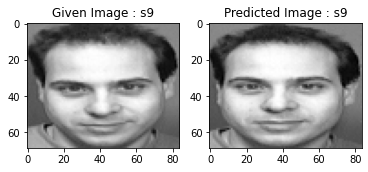

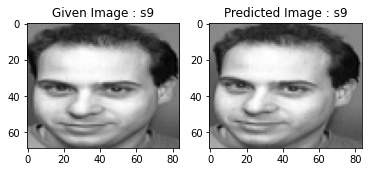

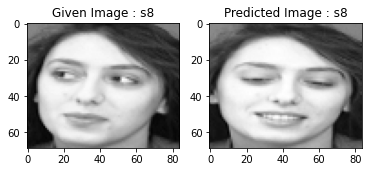

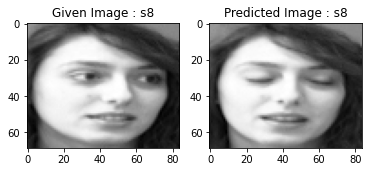

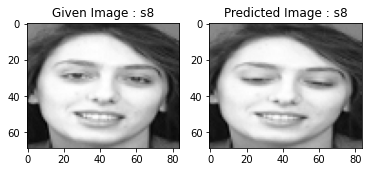

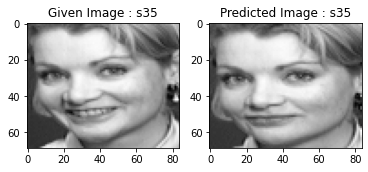

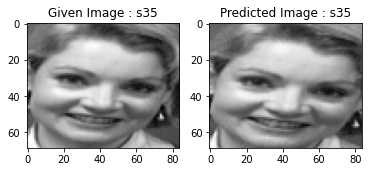

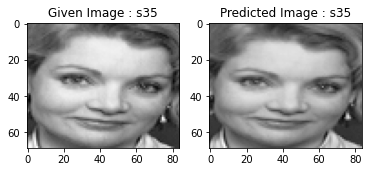

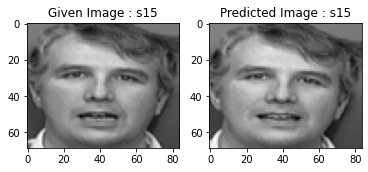

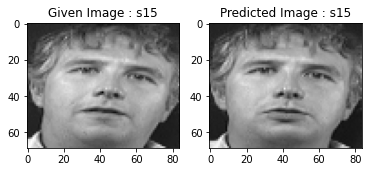

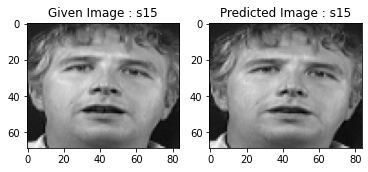

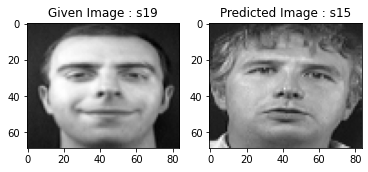

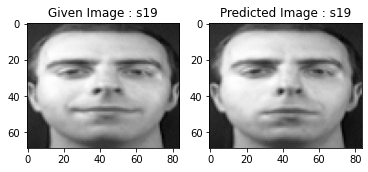

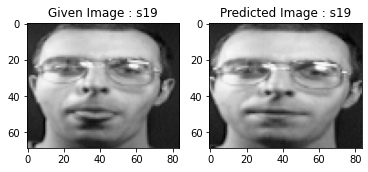

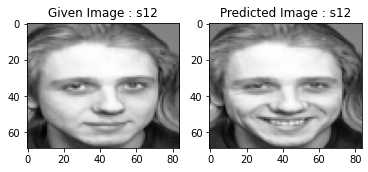

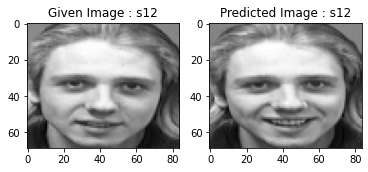

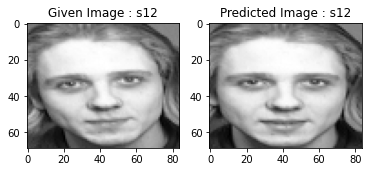

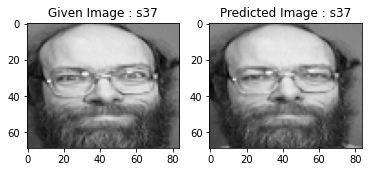

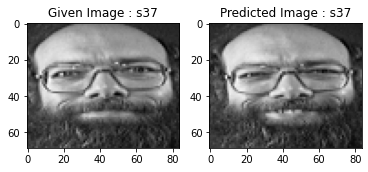

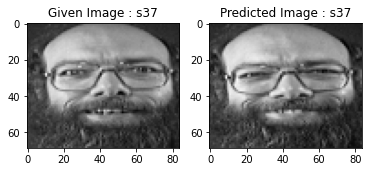

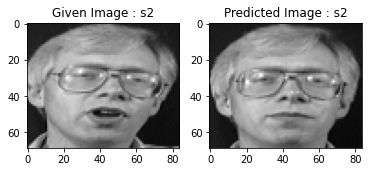

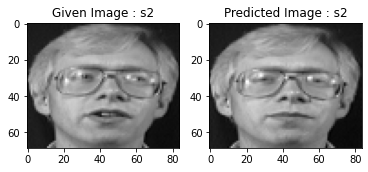

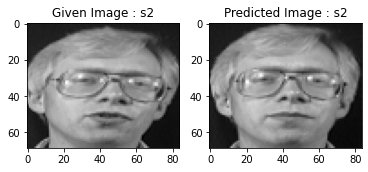

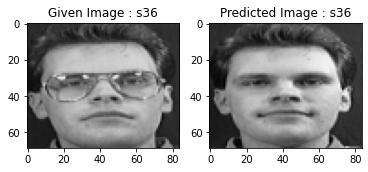

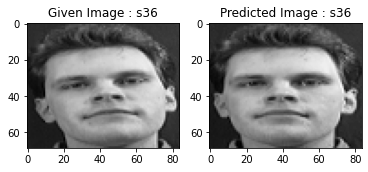

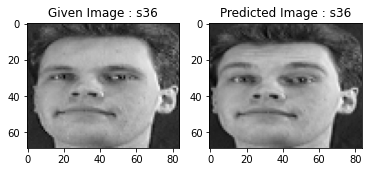

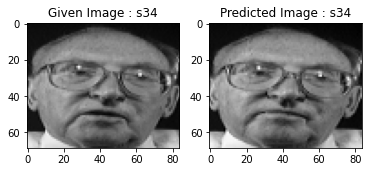

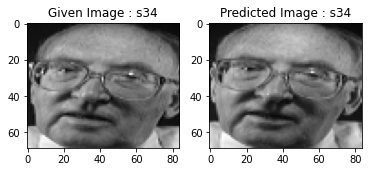

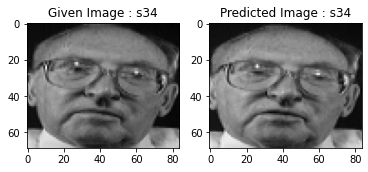

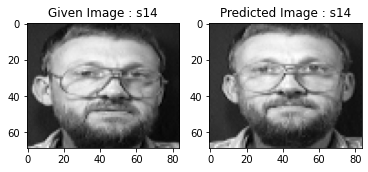

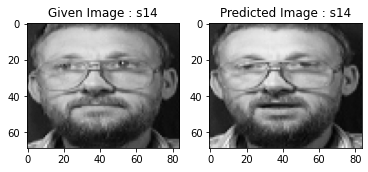

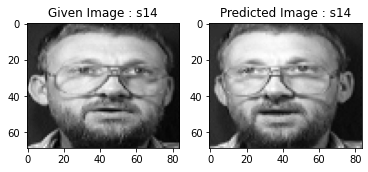

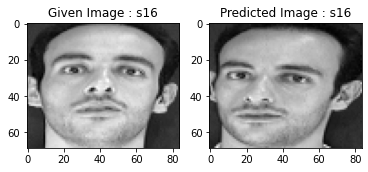

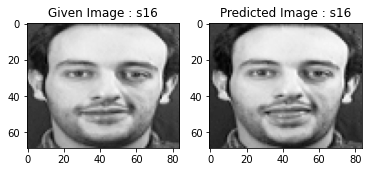

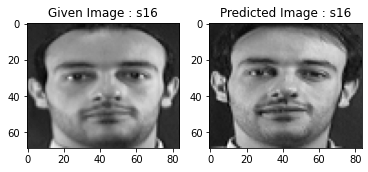

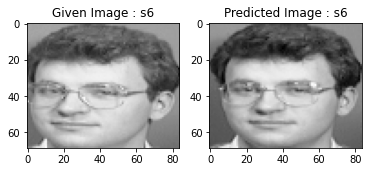

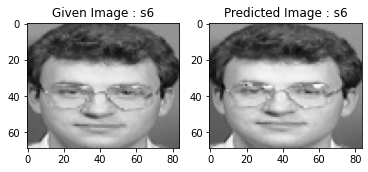

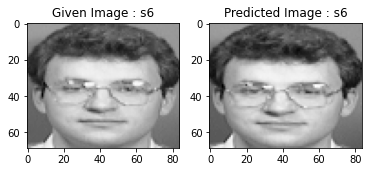

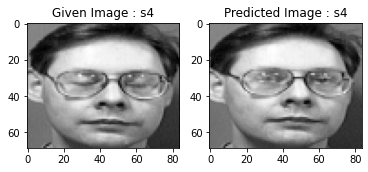

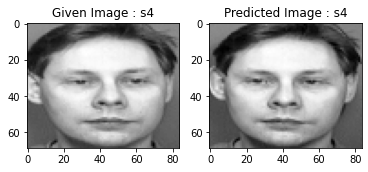

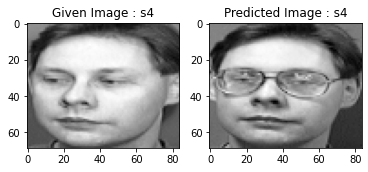

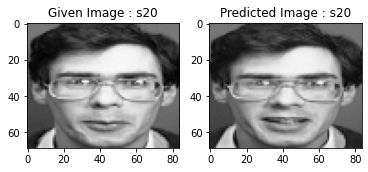

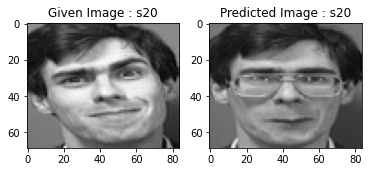

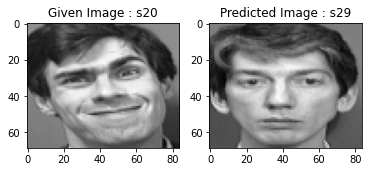

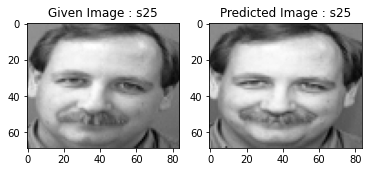

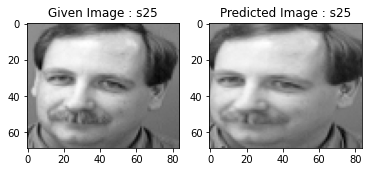

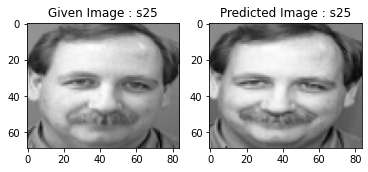

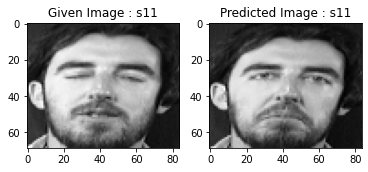

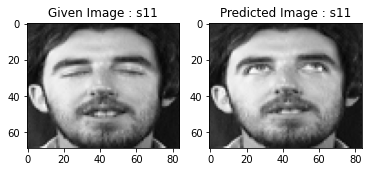

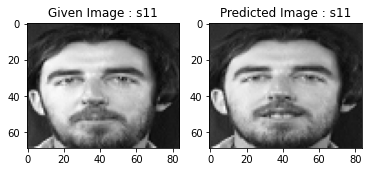

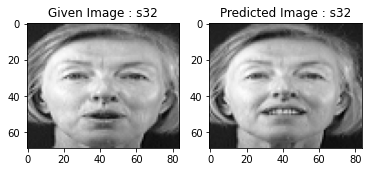

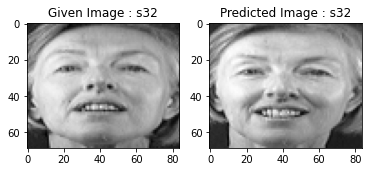

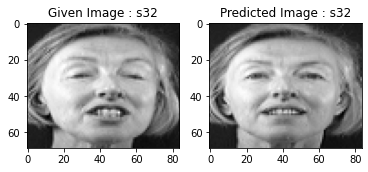

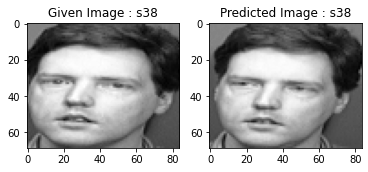

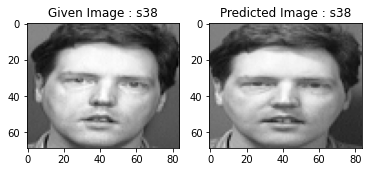

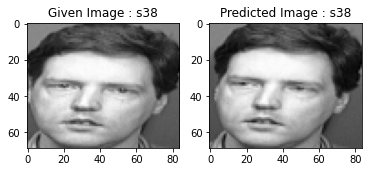

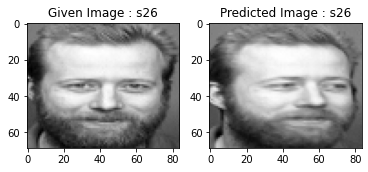

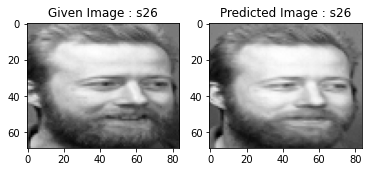

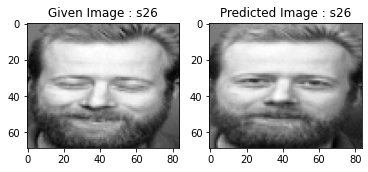

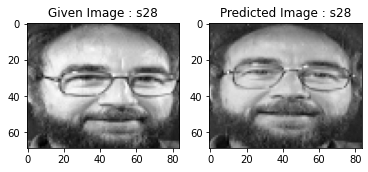

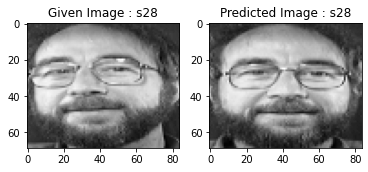

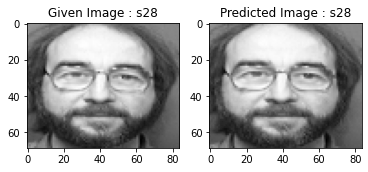

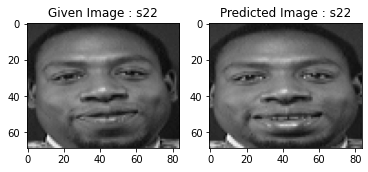

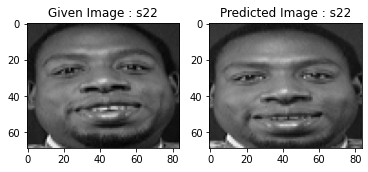

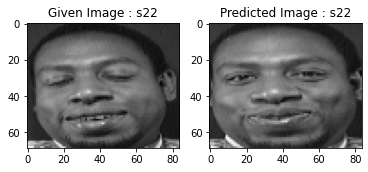

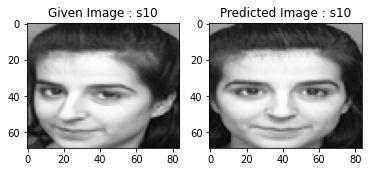

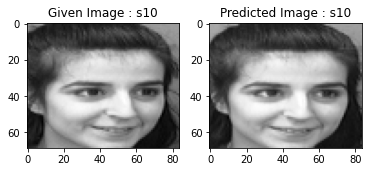

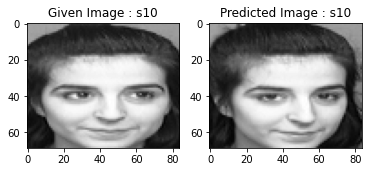

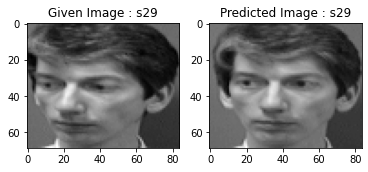

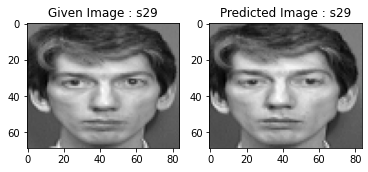

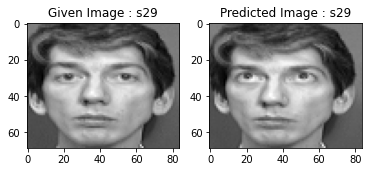

In [15]:
j = 0

correct= 0
ind = 0

for img in dataTestX:
    mindist=1e19
    deviationFromMean = (img-mean)
    eigTestimg = np.dot(img,W)
    for i in range(dataTrainX.shape[0]):
        dist = np.linalg.norm(eigFaceMatrix[i]-eigTestimg)
        if(dist<mindist):
            label = dataTrainY[i]
            mindist = dist
            ind = i;
#     print(label,dataTestY[j])
    fig,ax = plt.subplots(nrows = 1, ncols = 2)
    ax[0].set_title('Given Image : ' + dataTestY[j])
    ax[0].imshow(img.reshape(OrigDim[0],OrigDim[1]), cmap='gray')
    
    ax[1].set_title('Predicted Image : ' + label)
    ax[1].imshow(dataTrainX[ind].reshape(OrigDim[0],OrigDim[1]), cmap='gray')
    if(label==dataTestY[j]):
        correct+= 1;
    j += 1
    
accuracy = (correct/dataTestX.shape[0])*100
print("Accuracy = "+str(accuracy))
print("correct predicted="+str(correct))
print("total test images = "+str(dataTestX.shape[0]))
    